Name: Han Chen, Daniel Fernandez Davila

# Word Embeddings Creation

This Jupyter Notebook was created to create the word embeddings of the Tweets.

We used GloVe pre-trained embeddings, which are publicly available at https://nlp.stanford.edu/projects/glove/. We used the embeedings trained on 2B tweets. Those embeddings maps each word into a 200 dimmensional feature space. The advantage of using this method over Bag of Words, is that it captures the semantic of the words, for example it captures that the word 'bank' is closely related to the word 'money' (close in several measure of distances).

For creating the word embeddings for the tweets, we take the word embeddings for each word in the tweet and we take an average of those words and set this average vector as the feature space of the tweets.


In [2]:
#Loading the pre-trained word embeddings trained on Twitter
#Extract word and vector of values
import numpy as np
dictionary_vectors = {}
with open("./Embeddings/glove.twitter.27B/glove.twitter.27B.200d.txt", encoding='UTF-8') as f:
    for line in f:
        vector = line.split()
        values = np.asarray(vector[1:], dtype='float32')
        dictionary_vectors[vector[0]] = values


In [4]:
#Example of words
import pandas as pd
words = pd.DataFrame({'bictcoin':dictionary_vectors['bitcoin'], 'satoshi':dictionary_vectors['satoshi'],
                     'money':dictionary_vectors['money'],'rich':dictionary_vectors['rich'],
                     'buy':dictionary_vectors['buy'],'sell':dictionary_vectors['sell'],
                     'bank': dictionary_vectors['bank'],'food':dictionary_vectors['food'],
                     'tuna':dictionary_vectors['tuna'], 'mariachi':dictionary_vectors['mariachi'],
                     'taco':dictionary_vectors['taco'], 'dog':dictionary_vectors['dog'],
                     'monkey':dictionary_vectors['monkey'], 'crypto':dictionary_vectors['crypto'],
                     'btc':dictionary_vectors['btc'], 'currency':dictionary_vectors['currency'],
                     'gold':dictionary_vectors['gold'], 'mexico':dictionary_vectors['mexico'],
                     'beach':dictionary_vectors['beach'], 'salsa':dictionary_vectors['salsa']})
words.head(10).T

,0,1,2,3,4,5,6,7,8,9
bank,0.200700,0.232490,0.238210,-0.509120,0.140870,-0.216930,0.092754,-0.327010,0.642340,-0.047847
beach,-0.496610,-0.541980,0.433390,-0.176400,0.182570,-0.056407,-0.164410,0.059132,0.109270,-0.460080
bictcoin,-0.074393,0.101860,-0.049351,-0.531660,0.257060,-0.522200,0.170460,-0.188930,0.288970,-0.121840
btc,0.232220,-0.250610,-0.486060,-0.312080,0.527510,-0.542020,-0.059901,0.198970,-0.012371,0.408920
buy,-0.577850,0.349650,0.093972,0.322520,-0.056283,-0.140570,1.365100,0.065710,0.654040,0.158580
crypto,0.013408,0.530060,0.400410,0.476330,0.675450,-0.203730,0.247620,0.040441,-0.358080,-0.213470
currency,-0.524160,0.436640,0.131650,0.125930,-0.182200,-0.223690,0.521210,-0.399200,0.341840,-0.042816
dog,-0.495860,-0.593690,-0.107000,0.055930,-0.246330,-0.140210,0.637070,0.024992,0.251190,-0.556020
food,-0.691750,-0.142590,0.386530,-0.231410,-0.204080,-0.215650,0.778390,0.002269,-0.072446,-0.601340
gold,0.309620,-0.460850,-0.299360,-0.326480,-0.101080,0.148200,0.351590,0.186320,0.385970,-0.096536


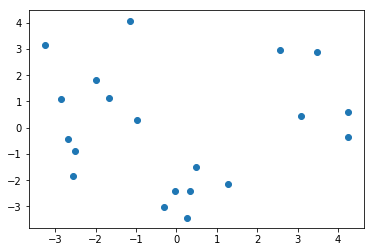

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit(words.T).transform(words.T)
plt.scatter(X_r[:, 0], X_r[:, 1])

In [34]:
pd.DataFrame(X_r, index = words.columns)

,0,1
bank,1.269247,-2.130301
beach,-2.678133,-0.421973
bictcoin,4.248582,0.581846
btc,3.076331,0.442317
buy,-0.306133,-3.039158
crypto,3.468353,2.896234
currency,4.251069,-0.359654
dog,-2.504912,-0.878332
food,-2.550700,-1.823839
gold,0.476012,-1.506886


In [78]:
#Import the data generated from previous JN
import spacy
import pandas as pd
base = pd.read_csv('data_to_ml_models_6.csv')
print(len(base))
base.head(50)

1388


,Unnamed: 0,open,close,change (%),movement,text,count
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1,"#Banks vs #cryptocurrency war: Bitfinex, OKcoi...",1
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1,The Bitcoin scaling debate reminds me of feedi...,2
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1,Bitcoin Origins RT @CHalexov2016: Time to buy ...,6
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1,@FredericJacobs @fchollet @EmmanuelMacron Le c...,5
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1,The end of cash: It a Bit harder to trace onli...,1
5,2017-04-24 06:00:00,1351.000000,1336.419090,-1.079268,-1,Another catastrophic bug in Bitcoin Unlimited....,3
6,2017-04-24 12:00:00,1336.020000,1340.300000,0.320354,1,#BitcoinUnlimited is production ready guys. RT...,5
7,2017-04-24 18:00:00,1340.300000,1347.399011,0.529658,1,One month ago I asked the attacker to attack B...,8
8,2017-04-25 00:00:00,1346.862890,1347.223600,0.026781,1,RT @btc_manager: Character Assassins for Hire:...,3
9,2017-04-25 06:00:00,1347.223600,1364.896000,1.311764,1,The fun starts &gt;$1260 imo #bitcoin RT @Vinn...,2


In [79]:
base = base[base.text.isnull() == False]
base = base.reset_index(drop=True)
base.head()

,Unnamed: 0,open,close,change (%),movement,text,count
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1,"#Banks vs #cryptocurrency war: Bitfinex, OKcoi...",1
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1,The Bitcoin scaling debate reminds me of feedi...,2
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1,Bitcoin Origins RT @CHalexov2016: Time to buy ...,6
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1,@FredericJacobs @fchollet @EmmanuelMacron Le c...,5
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1,The end of cash: It a Bit harder to trace onli...,1


In [71]:
len_rows = pd.Series([len(row) for row in base.text])
len_rows;

In [80]:
# Tokenize each tweet and remove puntuaction and non alphabetic characters.
import spacy
from operator import itemgetter
import re

#nlp = spacy.load('en_core_web_md', stop_words="english")
nlp = spacy.load('en', stop_words="english")
tweets = base.loc[:,'text']        

for tweet in range(len(tweets)):

    tokens_lower =[]
    # Tokenize each tweet
    
    tokens = nlp(tweets[tweet])
    for token in tokens:
            
    #Removes non alphabetic characters and punctuation and symbols
        if (re.match('[a-zA-Z]+$', token.orth_)) and not (token.is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SYM') and not (re.match('[Bb]itcoin', token.orth_)):
            # Append each tokenized and lower cased word in a list. (Each tweet is a list of tokens now)
            tokens_lower.append(token.lower_)
    tweets[tweet] = tokens_lower


/anaconda3/envs/spacy_env/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
tweets2 = tweets[pd.Series([len(i) > 0 for i in tweets])]

In [110]:
# create embedding feature matrix by attaching average embedding to each tweet
final_vectors_mean= np.zeros((len(tweets2), 200))
final_vectors_max= np.zeros((len(tweets2), 200))
final_vectors_min= np.zeros((len(tweets2), 200))
j = 0
for tweet in tweets2:
    embedding_matrix = np.zeros((len(tweet), 200))
    i = 0
    for token in tweet:
        #For each token in tweet get the embedding vector
        token_vector = dictionary_vectors.get(token)
        if token_vector is not None:
            # If its not null append in the embedding matrix
            embedding_matrix[i] = token_vector
            i+=1
    # Takes the mean of the vectors appended of each tweet
    final_vectors_mean[j] = embedding_matrix.mean(axis = 0)
    final_vectors_max[j]= embedding_matrix.max(axis = 0)
    final_vectors_min[j] = embedding_matrix.min(axis = 0)
    j += 1


In [96]:
print(len(base))
base.tail()

1386


,Unnamed: 0,open,close,change (%),movement,text,count
1381,2018-04-03 18:00:00,7419.388173,7412.270339,-0.095936,-1,"[never, miss, any, critical, related, news, ag...",172
1382,2018-04-04 00:00:00,7406.145999,7347.608797,-0.790387,-1,"[every, we, d, hosts, amp, discuss, new, field...",115
1383,2018-04-04 06:00:00,7358.884419,7054.051754,-4.142376,-1,"[thanks, following, jerwin, come, join, crypto...",71
1384,2018-04-04 12:00:00,7058.455973,6832.173030,-3.205842,-1,"[too, bad, got, ta, learn, hard, way, thanks, ...",150
1385,2018-04-04 18:00:00,6843.796444,6769.945088,-1.079099,-1,"[it, the, mobile, lightning, wallet, android, ...",144


In [112]:
embeddings = pd.DataFrame(final_vectors_mean)
embeddings_max = pd.DataFrame(final_vectors_max)
print(len(embeddings))
embeddings.head()

1385


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.012624,0.221876,-0.038813,-0.025875,-0.077889,0.005654,0.174705,-0.041629,0.107348,-0.052294,...,0.206866,-0.248529,0.038347,-0.047112,0.039724,-0.030455,0.148470,0.077294,0.030096,0.083379
1,0.058964,-0.025817,0.182265,0.063510,-0.157907,0.111233,0.377597,-0.014908,-0.126923,-0.180630,...,-0.086966,-0.197172,0.062457,0.022088,0.109503,-0.124608,0.182209,0.133733,-0.014163,0.106185
2,-0.031529,0.211298,-0.116589,0.097155,-0.058527,0.007341,0.469256,-0.058961,0.071554,-0.022231,...,0.050164,0.033500,0.113346,-0.108261,0.045596,0.081966,0.067613,0.163596,0.011211,0.054668
3,0.071112,0.110933,-0.048036,0.022549,-0.050571,0.059333,0.349546,-0.041088,-0.039191,0.041185,...,0.121811,-0.048703,0.069157,-0.076344,0.097576,0.006364,0.037520,0.183348,0.005154,0.054413
4,-0.047409,0.187053,0.027211,0.073167,0.071297,0.212266,0.354433,-0.192879,0.126784,0.037285,...,0.101252,-0.136425,0.150778,-0.203710,0.307542,-0.118546,-0.082693,0.377706,-0.112183,-0.139353


In [113]:
base_embeddings = base.merge(embeddings, how='inner', left_index=True,right_index=True)
base_embeddings_max = base.merge(embeddings_max, how='inner', left_index=True,right_index=True)

In [114]:
base_embeddings.to_csv('base_embeddings_6.csv')
base_embeddings_max.to_csv('base_embeddings_6_max.csv')